In [200]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [201]:
data = pd.read_csv('listings.csv') #Importing Dataset
MyPart = pd.DataFrame(); #Filtering out my Variables
count = 0; #Set Count
for var in data:
    count+=1;
    if(count >= 31 and count <=60):
        MyPart.insert(loc = 0,column = var, value =data[var]) #insert variables from 30 to 60


In [202]:
MyPart.dtypes # Checking if i extracted the correct Variables/

monthly_price                    object
weekly_price                     object
price                            object
square_feet                     float64
amenities                        object
bed_type                         object
beds                            float64
bedrooms                        float64
bathrooms                       float64
accommodates                      int64
room_type                        object
property_type                    object
is_location_exact                object
longitude                       float64
latitude                        float64
country                          object
country_code                     object
smart_location                   object
market                           object
zipcode                          object
state                            object
city                             object
neighbourhood_group_cleansed     object
neighbourhood_cleansed           object
neighbourhood                    object


In [203]:
print(len(MyPart)) #Checking if i copied all the rows

3818


In [204]:
Price = pd.DataFrame(MyPart["price"]) #Extracting Target Variable 1
Price['price'] = Price['price'].str.replace(',', '').str.replace('$', '')
Price = Price.apply(pd.to_numeric,errors='coerce')
Price.dtypes
ReviewScore = pd.DataFrame(data["review_scores_rating"]) #Extracting Target Variable 2

#Spliting Data base on their Type
MyPart_Numeric = pd.DataFrame(MyPart[["host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price"]])
MyPart_Categorical = pd.DataFrame(MyPart[["host_has_profile_pic","host_identity_verified","is_location_exact","property_type","room_type","bed_type"]])
MyPart_Unstructured = pd.DataFrame(MyPart[["host_verifications","street","neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed","city","state","market","smart_location","country_code","country","amenities"]])

In [205]:
#Dropping Useless Data
useless = ["zipcode","latitude","longitude","price"]
MyPart_Numeric=MyPart_Numeric.drop(axis=1,columns=useless)
print(MyPart_Numeric.dtypes)

host_total_listings_count    float64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
weekly_price                  object
monthly_price                 object
dtype: object


In [206]:
#Check if my variables are in the correct type
print("Before Change")
print(MyPart_Numeric.dtypes)

#Change the Type if it is wrong
MyPart_Numeric['weekly_price'] = MyPart_Numeric['weekly_price'] .str.replace(',', '').str.replace('$', '')
MyPart_Numeric['weekly_price'] = MyPart_Numeric['weekly_price'].apply(pd.to_numeric,errors='coerce')


MyPart_Numeric['monthly_price'] = MyPart_Numeric['monthly_price'] .str.replace(',', '').str.replace('$', '')
MyPart_Numeric['monthly_price'] = MyPart_Numeric['monthly_price'].apply(pd.to_numeric,errors='coerce')
MyPart_Numeric['accommodates'] = MyPart_Numeric['accommodates'].apply(pd.to_numeric,errors='coerce')
MyPart_Numeric['bathrooms'] = MyPart_Numeric['bathrooms'].apply(pd.to_numeric,errors='coerce')
MyPart_Numeric['bedrooms'] = MyPart_Numeric['bedrooms'].apply(pd.to_numeric,errors='coerce')
MyPart_Numeric['beds'] = MyPart_Numeric['beds'].apply(pd.to_numeric,errors='coerce')

MyPart_Numeric=MyPart_Numeric.dropna()
ReviewScore=ReviewScore.dropna()

print("")
print("After Change")
print(MyPart_Numeric.dtypes)
MyPart_Numeric.head()


Before Change
host_total_listings_count    float64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
weekly_price                  object
monthly_price                 object
dtype: object

After Change
host_total_listings_count    float64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
weekly_price                 float64
monthly_price                float64
dtype: object


,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price
1,6.0,4,1.0,1.0,1.0,1000.0,3000.0
3,1.0,3,1.0,0.0,2.0,650.0,2300.0
8,1.0,2,1.0,1.0,1.0,500.0,1700.0
9,6.0,4,1.0,1.0,1.0,1000.0,3000.0
11,1.0,2,1.0,1.0,1.0,800.0,2000.0


In [212]:
#Split my dataset and Target Variable into 70% train set and 30% test set
MyPart_Numeric_Train = pd.DataFrame(MyPart_Numeric[:2672])
MyPart_Numeric_Test = pd.DataFrame(MyPart_Numeric[-1146:])
MyPart_Categorical_Train = pd.DataFrame(MyPart_Categorical[:2672])
MyPart_Categorical_Test = pd.DataFrame(MyPart_Categorical[-1146:])
Price_Train = pd.DataFrame(Price[:2672])
Price_Test = pd.DataFrame(Price[-1146:])
ReviewScore_Train = pd.DataFrame(ReviewScore[:2672])
ReviewScore_Test = pd.DataFrame(ReviewScore[-1146:])

print("Train Set :", MyPart_Numeric_Train.shape, MyPart_Categorical_Train.shape, Price_Train.shape, ReviewScore_Train.shape)
print("Test Set  :", MyPart_Numeric_Test.shape, MyPart_Categorical_Test.shape, Price_Test.shape, ReviewScore_Test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1409, 3818]

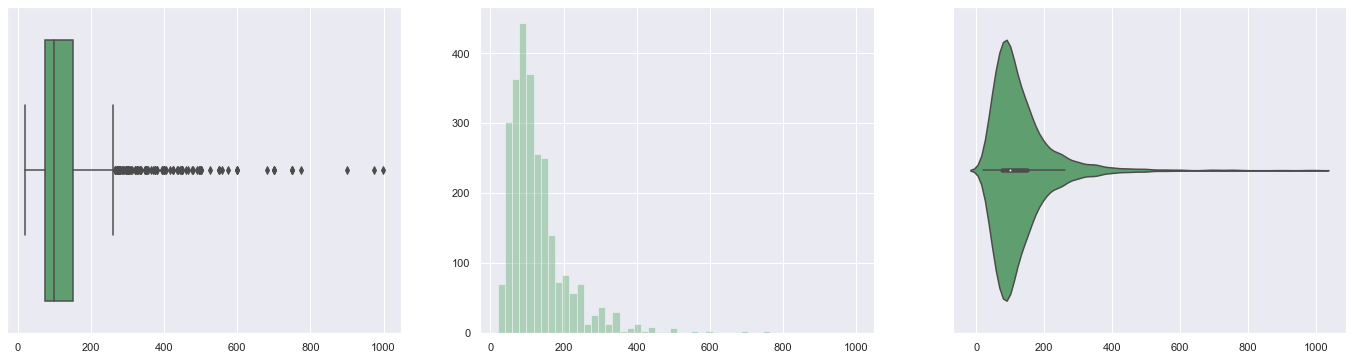

In [208]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(Price_Train, orient = "h", ax = axes[0], color = "g")
sb.distplot(Price_Train, kde = False, ax = axes[1], color = "g")
sb.violinplot(Price_Train, ax = axes[2], color = "g")

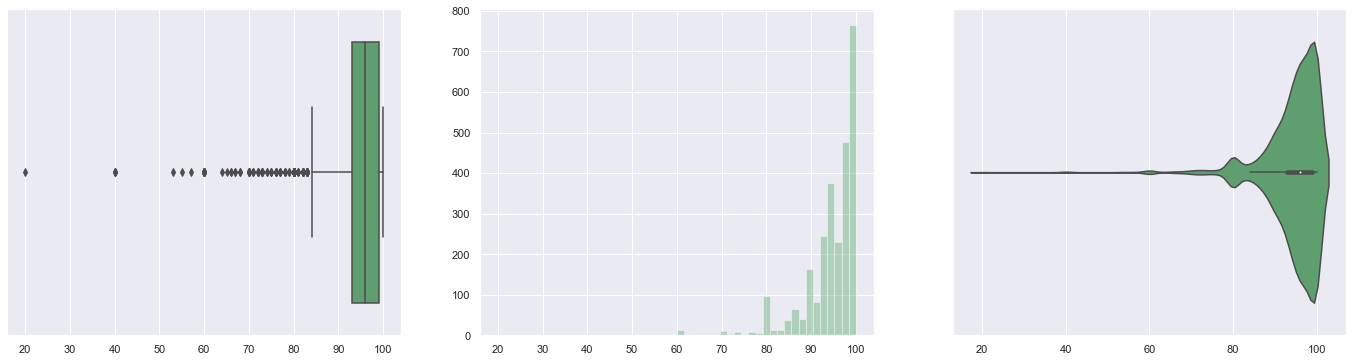

In [214]:
ReviewScore_Train=ReviewScore_Train.dropna()

# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(ReviewScore_Train, orient = "h", ax = axes[0], color = "g")
sb.distplot(ReviewScore_Train, kde = False, ax = axes[1], color = "g")
sb.violinplot(ReviewScore_Train, ax = axes[2], color = "g")

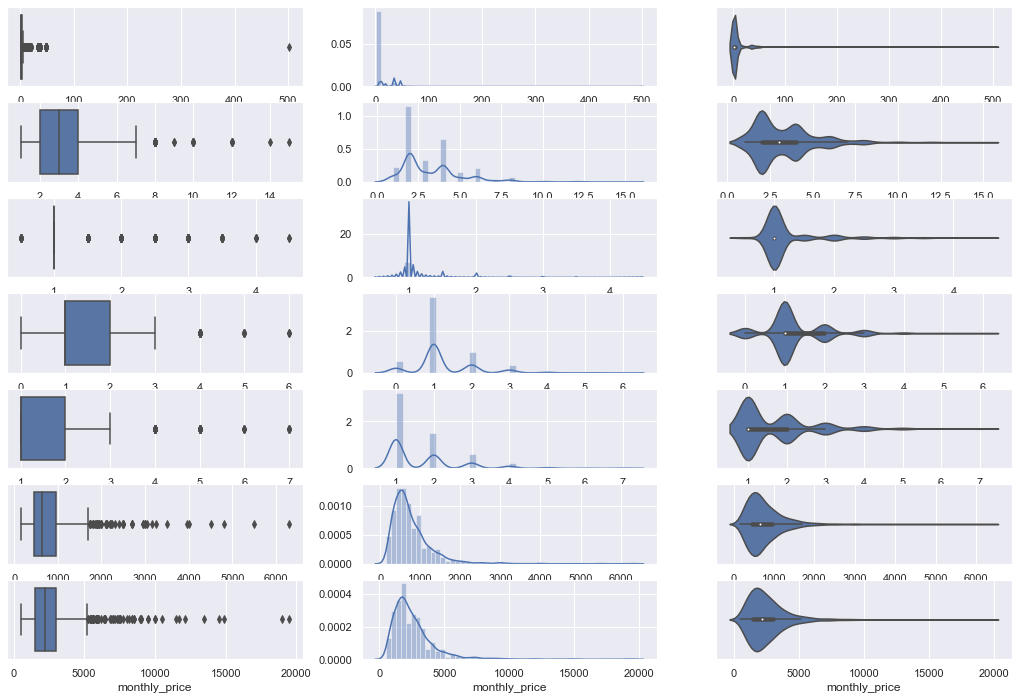

In [218]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(7, 3, figsize=(18, 12))

count = 0
for var in MyPart_Numeric_Train:
    sb.boxplot(MyPart_Numeric_Train[var], orient = "h", ax = axes[count,0])
    sb.distplot(MyPart_Numeric_Train[var], ax = axes[count,1])
    sb.violinplot(MyPart_Numeric_Train[var], ax = axes[count,2])
    count += 1

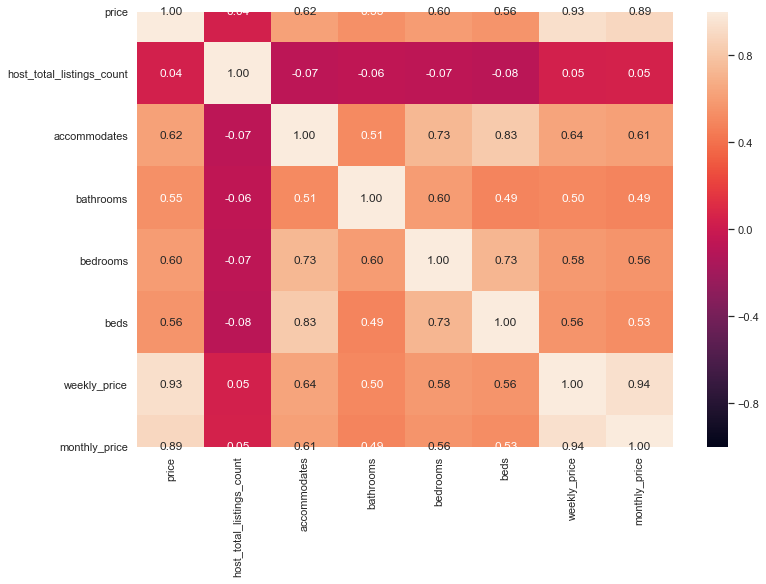

In [216]:
# Correlation between Response and the Predictors
trainDF = pd.concat([Price_Train, MyPart_Numeric_Train.reindex(index=MyPart_Numeric_Train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

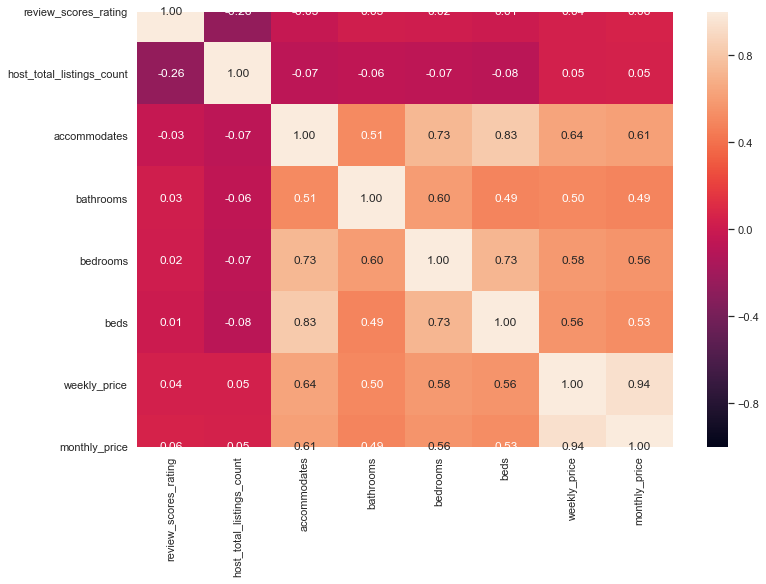

In [217]:
# Correlation between Response and the Predictors
trainDF = pd.concat([ReviewScore_Train, MyPart_Numeric_Train.reindex(index=MyPart_Numeric_Train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")